<h1>College Students Food Choices and Preferences</h1>

<h2>About Data</h2>

College students' food preferences, dietary habits, inclinations, childhood favorites, eating habits, preferred cuisines and other details are all included in this dataset. There are 125 responses from Mercyhurst University students.

<h2>Data Source</h2>
<ul>
<li>Survey Data - This data was referred from Borapajo in kaggle

<i>link to access data: https://www.kaggle.com/datasets/borapajo/food-choices?resource=download</i>
    </li>
</ul>

<h2>Purpose</h2>

The intent to work on this analysis is to find answers for these below questions.

<ul>
    <li>Can people maintain their physical fitness and well-being based on their dietary choices and lifestyle choices?</li>
    <li>Apart from being aware of the unhealthy food, is there any explanation for why students continue to have it?</li>
    <li>Do things like financial standing, family history, and childhood dietary preferences still have an impact on the foods students choose to eat now?</li>
    <li>Can we learn anything from the student survey replies to figure out how to make healthy food taste good?</li>
</ul>
    

<h2>1. Importing Data</h2>

In [1]:
# importing neccessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading data from excel using pandas
Food_Choices = pd.read_excel('food_coded.xlsx')


In [3]:
Food_Choices.head()

,Gender,breakfast,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,cuisine,...,marital_status,mother_profession,parents_cook,pay_meal_out,soup,sports,type_sports,veggies_day,vitamins,weight
0,Male,Cereal,NaN,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,NaN,...,Single,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,In a relationship,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,In a relationship,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,I'm not answering this.
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,In a relationship,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,NaN,neutral,yes,"Not sure, 240"
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Single,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190


<h3> Renaming few columns for better readability and Understanding </h3>

In [4]:
Food_Choices.rename(columns = {'breakfast':'Breakfast Choice', 'calories_day':'Importance_of_calories', 'coffee':'coffee_preference','cook':'frequency_of_cooking','soup':'soup_preference','vitamins':'vitamins_supplements','weight':'weight(in pounds)'},inplace = True)

In [5]:
Food_Choices.head()

,Gender,Breakfast Choice,Importance_of_calories,calories_scone,coffee_preference,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,frequency_of_cooking,cuisine,...,marital_status,mother_profession,parents_cook,pay_meal_out,soup_preference,sports,type_sports,veggies_day,vitamins_supplements,weight(in pounds)
0,Male,Cereal,NaN,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,NaN,...,Single,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,In a relationship,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,In a relationship,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,I'm not answering this.
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,In a relationship,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,NaN,neutral,yes,"Not sure, 240"
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Single,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190


<h2>2. Handling Missing Data</h2>

Check if there are any missing values or NAN values in each column of data set

In [6]:
# handling missing values in 'comfort_food_reasons_coded' column
Food_Choices['comfort_food_reasons_coded'] = Food_Choices['comfort_food_reasons_coded'].astype('str')
comfort_reasons = Food_Choices['comfort_food_reasons']
comfort_reasons_coding = Food_Choices['comfort_food_reasons_coded']
length = len(comfort_reasons)




for i in range(length):
    if str(comfort_reasons_coding[i]) == 'nan':
        if 'Stress'.lower() in comfort_reasons[i].lower():
            comfort_reasons_coding[i].replace('nan','stress')
        elif('sadness'.lower() in comfort_reasons[i].lower() or 'sad'.lower() in comfort_reasons[i].lower()):
            comfort_reasons_coding[i].replace('nan','depression/sadness')
        elif('boredom'.lower() in comfort_reasons[i].lower()):
            comfort_reasons_coding[i].replace('nan','boredom')
        elif('happiness'.lower() in comfort_reasons[i].lower()):
            comfort_reasons_coding[i].replace('nan','happiness')
        elif('hormones'.lower() in comfort_reasons[i].lower()):
            comfort_reasons_coding[i].replace('nan','hormones')
        elif('tired'.lower() in comfort_reasons[i].lower()):
            comfort_reasons_coding[i].replace('nan','Tired')
Food_Choices['comfort_food_reasons_coded'] = comfort_reasons_coding
Food_Choices['comfort_food_reasons_coded'].unique()

array(['none', 'stress', 'boredom', 'hunger', 'depression/sadness',
       'happiness', 'cold weather', 'laziness', 'watching tv', 'nan'],
      dtype=object)

In [7]:
# checking if there are still any missing values
Food_Choices['comfort_food_reasons_coded'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
120    False
121    False
122    False
123    False
124    False
Name: comfort_food_reasons_coded, Length: 125, dtype: bool

In [8]:
Food_Choices.head()

,Gender,Breakfast Choice,Importance_of_calories,calories_scone,coffee_preference,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,frequency_of_cooking,cuisine,...,marital_status,mother_profession,parents_cook,pay_meal_out,soup_preference,sports,type_sports,veggies_day,vitamins_supplements,weight(in pounds)
0,Male,Cereal,NaN,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,NaN,...,Single,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,In a relationship,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,In a relationship,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,I'm not answering this.
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,In a relationship,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,NaN,neutral,yes,"Not sure, 240"
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Single,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190


In [9]:
# handling missing values by filling NaN values with not mentioned string for qualitative data
Food_Choices['Importance_of_calories'] = Food_Choices['Importance_of_calories'].fillna('not mentioned')
Food_Choices['calories_scone'] = Food_Choices['calories_scone'].fillna(0.0)
Food_Choices['frequency_of_cooking'] = Food_Choices['frequency_of_cooking'].fillna('not mentioned')
Food_Choices['cuisine'] = Food_Choices['cuisine'].fillna('not mentioned')
Food_Choices['marital_status'] = Food_Choices['marital_status'].fillna('not mentioned')
Food_Choices['mother_profession'] = Food_Choices['mother_profession'].fillna('not mentioned')
Food_Choices['parents_cook'] = Food_Choices['parents_cook'].fillna('not mentioned')
Food_Choices['pay_meal_out'] = Food_Choices['pay_meal_out'].fillna('not mentioned')
Food_Choices['soup_preference'] = Food_Choices['soup_preference'].fillna('not mentioned')
Food_Choices['sports'] = Food_Choices['sports'].fillna('not mentioned')
Food_Choices['type_sports'] = Food_Choices['type_sports'].fillna('not mentioned')


In [10]:
# cleaning 'weight in pounds ' columns

for i in range(len(Food_Choices['weight(in pounds)'])):
    if 'lbs' in str(Food_Choices['weight(in pounds)'][i]):
        Food_Choices['weight(in pounds)'][i] = Food_Choices['weight(in pounds)'][i][:-3]
    elif 'Not sure' in str(Food_Choices['weight(in pounds)'][i]):
        Food_Choices['weight(in pounds)'][i] = int(Food_Choices['weight(in pounds)'][i][-4:])
    elif 'not answering this.' in str(Food_Choices['weight(in pounds)'][i]):
        Food_Choices['weight(in pounds)'][i] = int(0)


C:\Users\tejas\AppData\Local\Temp\ipykernel_16708\835400196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food_Choices['weight(in pounds)'][i] = int(0)
C:\Users\tejas\AppData\Local\Temp\ipykernel_16708\835400196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food_Choices['weight(in pounds)'][i] = int(Food_Choices['weight(in pounds)'][i][-4:])
C:\Users\tejas\AppData\Local\Temp\ipykernel_16708\835400196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [11]:
Food_Choices.head()

,Gender,Breakfast Choice,Importance_of_calories,calories_scone,coffee_preference,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,frequency_of_cooking,cuisine,...,marital_status,mother_profession,parents_cook,pay_meal_out,soup_preference,sports,type_sports,veggies_day,vitamins_supplements,weight(in pounds)
0,Male,Cereal,not mentioned,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,not mentioned,...,Single,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,In a relationship,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,In a relationship,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,0
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,In a relationship,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,not mentioned,neutral,yes,240
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Single,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190


In [12]:
# adding a Id Column to uniquely identify each row.
identity = []
for i in range(125):
    temp = 'Student' + str(i+1)
    identity.append(temp)
Food_Choices['Identity'] = identity

In [13]:
Food_Choices.head()

,Gender,Breakfast Choice,Importance_of_calories,calories_scone,coffee_preference,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,frequency_of_cooking,cuisine,...,mother_profession,parents_cook,pay_meal_out,soup_preference,sports,type_sports,veggies_day,vitamins_supplements,weight(in pounds),Identity
0,Male,Cereal,not mentioned,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,not mentioned,...,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187,Student1
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155,Student2
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,0,Student3
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,not mentioned,neutral,yes,240,Student4
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190,Student5


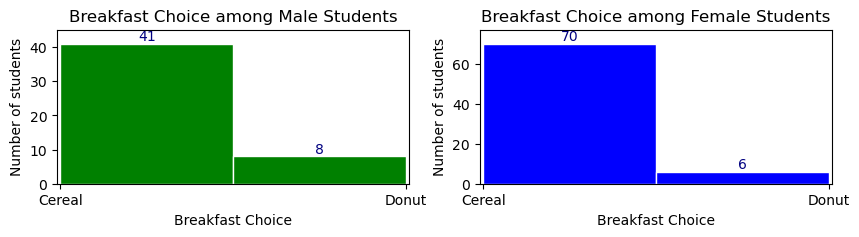

In [14]:
breakfast_choices_by_gender = {"Male":[],"Female":[]}
for i in range(125):
    if Food_Choices['Gender'][i] == "Male":
        breakfast_choices_by_gender['Male'].append(Food_Choices['Breakfast Choice'][i])
    elif Food_Choices['Gender'][i] == "Female":
        breakfast_choices_by_gender['Female'].append(Food_Choices['Breakfast Choice'][i])
#print(breakfast_choices_by_gender)


fig, ax = plt.subplots(1, 2, figsize=(10, 2))
values,bins,bars = ax[0].hist(breakfast_choices_by_gender['Male'], color = 'green', bins = 2, edgecolor='white')
ax[0].set_xlabel("Breakfast Choice")
ax[0].set_ylabel("Number of students")
ax[0].set_title('Breakfast Choice among Male Students')
ax[0].bar_label(bars, fontsize=10, color='navy')
ax[0].margins(x=0.01, y=0.1)



values,bins,bars = ax[1].hist(breakfast_choices_by_gender['Female'], color = 'Blue', bins = 2, edgecolor='white')
ax[1].set_xlabel("Breakfast Choice")
ax[1].set_ylabel("Number of students")
ax[1].set_title('Breakfast Choice among Female Students')
ax[1].bar_label(bars, fontsize=10, color='navy')
ax[1].margins(x=0.01, y=0.1)

plt.show()


The accompanying visuals clearly show that the majority of females and males choose cereals for breakfast over donuts.

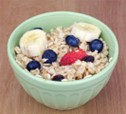
According to <b>'National Library of Medicine'</b> regular breakfast cereal consumers have
<ul>
    <li>higher intakes of carbohydrate</li>
    <li>higher intakes of total sugars</li>
    <li>lower intakes of fat</li>
    <li>lower cholesterol intakes</li>
    <li>enhanced micronutrient intakes</li>
    <li>higher milk intakes</li>
</ul>



![Donuts.jpg](attachment:Donuts.jpg)
Donuts are among the most delectable foods on the planet, but they are not always healthy. Donuts have a few hundred calories each. Each jelly-filled donut from Dunkin' Donuts contains 221 calories. Of course, you need calories, but there are numerous different ways to receive the calories you require in the morning that will keep you satisfied until your next meal. The goal is to avoid binge-eating five donuts at seven a.m. There's a lot of sugar in that lovely shining coating. The normal donut contains approximately 11 grams of sugar, but a chocolate donut with sprinkles from Dunkin' Donuts contains 15 grams of sugar and 270 calories. 
<a href = 'https://spoonuniversity.com/lifestyle/donuts-are-not-breakfast-food-they-are-dessert-food'>read more</a>

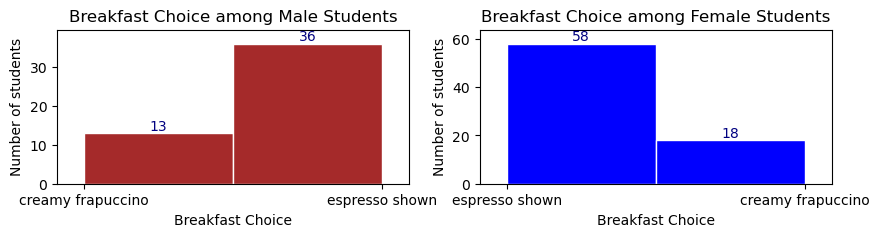

In [15]:
coffee_choices_by_gender = {"Male":[],"Female":[]}
for i in range(125):
    if Food_Choices['Gender'][i] == "Male":
        coffee_choices_by_gender['Male'].append(Food_Choices['coffee_preference'][i])
    elif Food_Choices['Gender'][i] == "Female":
        coffee_choices_by_gender['Female'].append(Food_Choices['coffee_preference'][i])
#print(breakfast_choices_by_gender)


fig, ax = plt.subplots(1, 2, figsize=(10, 2))
values,bins,bars = ax[0].hist(coffee_choices_by_gender['Male'], color = 'brown', bins = 2, edgecolor='white')
ax[0].set_xlabel("Breakfast Choice")
ax[0].set_ylabel("Number of students")
ax[0].set_title('Breakfast Choice among Male Students')
ax[0].bar_label(bars, fontsize=10, color='navy')
ax[0].margins(x=0.09, y=0.1)



values,bins,bars = ax[1].hist(coffee_choices_by_gender['Female'], color = 'Blue', bins = 2, edgecolor='white')
ax[1].set_xlabel("Breakfast Choice")
ax[1].set_ylabel("Number of students")
ax[1].set_title('Breakfast Choice among Female Students')
ax[1].bar_label(bars, fontsize=10, color='navy')
ax[1].margins(x=0.09, y=0.1)

plt.show()

In [16]:
Food_Choices.head()

,Gender,Breakfast Choice,Importance_of_calories,calories_scone,coffee_preference,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,frequency_of_cooking,cuisine,...,mother_profession,parents_cook,pay_meal_out,soup_preference,sports,type_sports,veggies_day,vitamins_supplements,weight(in pounds),Identity
0,Male,Cereal,not mentioned,315.0,creamy frapuccino,none,we dont have comfort,none,A couple of times a week,not mentioned,...,unemployed,Almost everyday,$5.01 to $10.00,veggie soup,Yes,car racing,very likely,yes,187,Student1
1,Female,Cereal,it is moderately important,420.0,espresso shown,"chocolate, chips, ice cream","Stress, bored, anger",stress,"Whenever I can, but that is not very often",American,...,Nurse RN,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Basketball,likely,no,155,Student2
2,Female,Cereal,it is very important,420.0,espresso shown,"frozen yogurt, pizza, fast food","stress, sadness",stress,Every day,Korean/Asian,...,owns business,Almost everyday,$10.01 to $20.00,veggie soup,No,none,very likely,yes,0,Student3
3,Female,Cereal,it is moderately important,420.0,espresso shown,"Pizza, Mac and cheese, ice cream",Boredom,boredom,A couple of times a week,Mexican/Spanish,...,Special Education Teacher,Almost everyday,$5.01 to $10.00,veggie soup,No,not mentioned,neutral,yes,240,Student4
4,Female,Cereal,it is not at all important,420.0,espresso shown,"Ice cream, chocolate, chips","Stress, boredom, cravings",stress,Every day,Mexican/Spanish,...,Substance Abuse Conselor,Almost everyday,$20.01 to $30.00,veggie soup,Yes,Softball,likely,no,190,Student5


['boredom', 'cold weather', 'depression/sadness', 'happiness', 'hunger', 'laziness', 'nan', 'none', 'stress', 'watching tv']
[21, 0, 6, 2, 1, 3, 5, 4, 7, 0]
[28, 1, 12, 1, 2, 1, 14, 1, 15, 1]


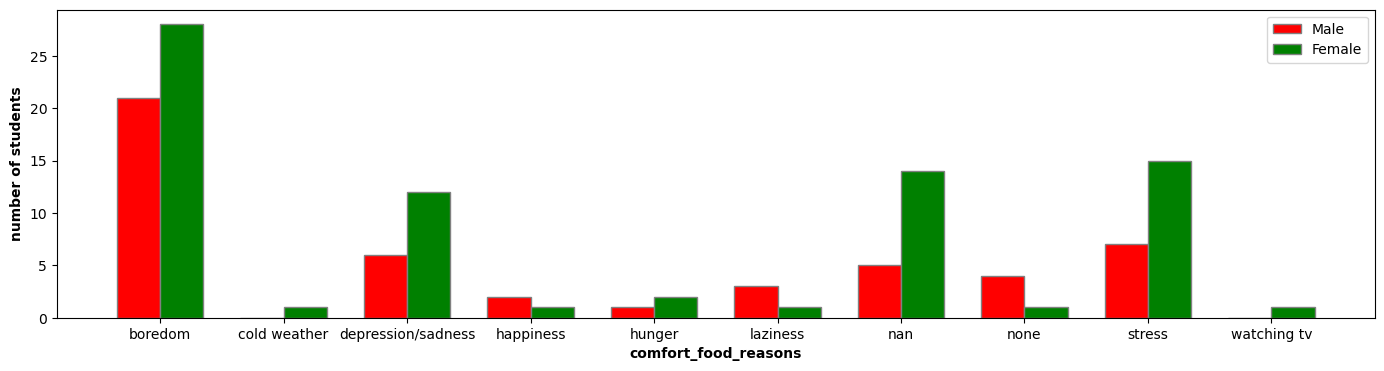

In [33]:
comfort_food_reasons_by_gender = {"Male":[],"Female":[]}
for i in range(125):
    if Food_Choices['Gender'][i] == "Male":
        comfort_food_reasons_by_gender['Male'].append(Food_Choices['comfort_food_reasons_coded'][i])
    elif Food_Choices['Gender'][i] == "Female":
        comfort_food_reasons_by_gender['Female'].append(Food_Choices['comfort_food_reasons_coded'][i])

unique_comfort_food_reasons = []
for i in range(125):
    if Food_Choices['comfort_food_reasons_coded'][i] not in unique_comfort_food_reasons:
        unique_comfort_food_reasons.append(Food_Choices['comfort_food_reasons_coded'][i])

unique_comfort_food_reasons.sort()
print(unique_comfort_food_reasons)
male_comfort_food_reasons = []
for i in unique_comfort_food_reasons:
    male_comfort_food_reasons.append(comfort_food_reasons_by_gender['Male'].count(i))
print(male_comfort_food_reasons)
female_comfort_food_reasons = []
for i in unique_comfort_food_reasons:
    female_comfort_food_reasons.append(comfort_food_reasons_by_gender['Female'].count(i))
print(female_comfort_food_reasons)

bar_width = 0.35

r1 = np.arange(len(unique_comfort_food_reasons))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(17, 4))

plt.bar(r1, male_comfort_food_reasons, color = 'red' , width = bar_width, edgecolor = 'grey', label = 'Male')
plt.bar(r2, female_comfort_food_reasons, color = 'green', width = bar_width, edgecolor = 'grey', label = 'Female')

plt.xlabel('comfort_food_reasons',fontweight = 'bold')
plt.ylabel('number of students',fontweight = 'bold')
plt.xticks([r + bar_width/2 for r in range(len(unique_comfort_food_reasons))],unique_comfort_food_reasons)
plt.legend()

plt.show()



From the above chart it can be observed that most of the male and female prefer their comfort food choices due to boredom or depression/stress.